In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv(r"C:\Users\bhumu\Downloads\heart.csv")

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**Data Description**

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest pain type

Value 1: typical angina <br>
Value 2: atypical angina <br>
Value 3: non-anginal pain <br>
Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal <br>
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br>
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria <br>

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
num_df = df[["age","trtbps","chol","thalachh","oldpeak"]]

In [6]:
num_df

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


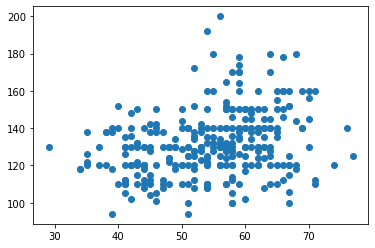

In [7]:
plt.scatter(num_df["age"],num_df["trtbps"])

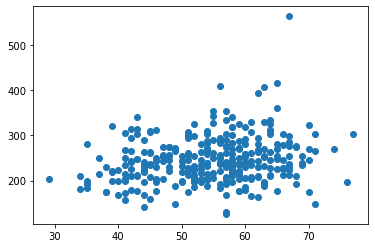

In [8]:
plt.scatter(num_df["age"],num_df["chol"])

1. we need to remove the outliers where chol > 500

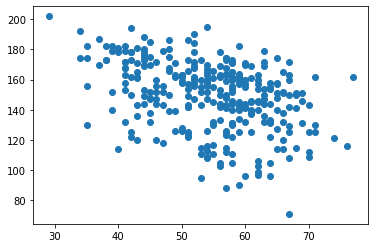

In [9]:
plt.scatter(num_df["age"],num_df["thalachh"])

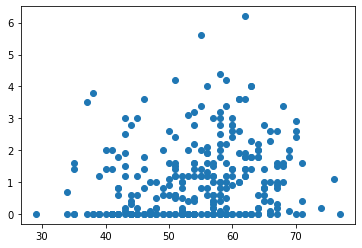

In [10]:
plt.scatter(num_df["age"],num_df["oldpeak"])

2. Since oldpeak has lesser variation with the age better not to consider it at initial stage of prediction.


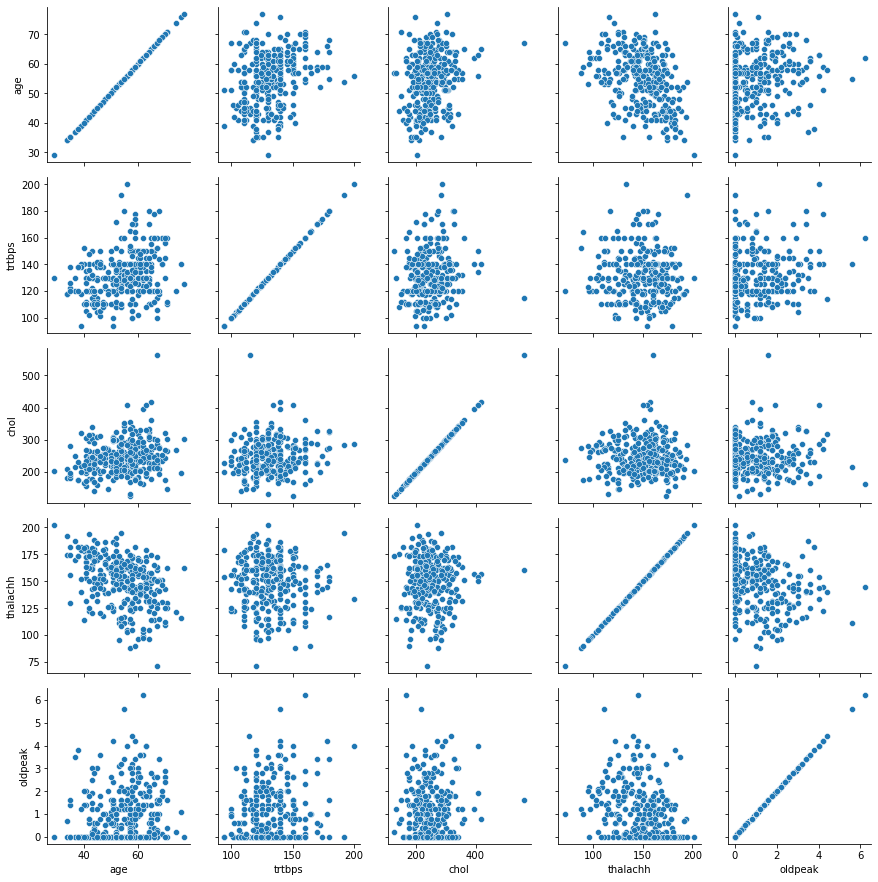

In [11]:
h = sns.PairGrid(num_df)
h.map(sns.scatterplot)

In [12]:
new_df = df.drop(df[df["chol"]>500].index)

In [13]:
new_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Categorical Data Handling 

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
ohe = OneHotEncoder()

In [17]:
ct = ColumnTransformer(transformers = [("ohe", ohe, ["sex","cp","fbs","restecg","exng","slp","caa","thall"])], remainder = "passthrough")

In [18]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(),
                                 ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp',
                                  'caa', 'thall'])])

In [19]:
new_df = ct.fit_transform(new_df)

In [20]:
new_df

array([[  0. ,   1. ,   0. , ..., 150. ,   2.3,   1. ],
       [  0. ,   1. ,   0. , ..., 187. ,   3.5,   1. ],
       [  1. ,   0. ,   0. , ..., 172. ,   1.4,   1. ],
       ...,
       [  0. ,   1. ,   1. , ..., 141. ,   3.4,   0. ],
       [  0. ,   1. ,   1. , ..., 115. ,   1.2,   0. ],
       [  1. ,   0. ,   0. , ..., 174. ,   0. ,   0. ]])

In [21]:
new_df1 = pd.DataFrame(new_df, columns = ct.get_feature_names_out())

In [22]:
new_df1

,ohe__sex_0,ohe__sex_1,ohe__cp_0,ohe__cp_1,ohe__cp_2,ohe__cp_3,ohe__fbs_0,ohe__fbs_1,ohe__restecg_0,ohe__restecg_1,...,ohe__thall_0,ohe__thall_1,ohe__thall_2,ohe__thall_3,remainder__age,remainder__trtbps,remainder__chol,remainder__thalachh,remainder__oldpeak,remainder__output
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,63.0,145.0,233.0,150.0,2.3,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,37.0,130.0,250.0,187.0,3.5,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,41.0,130.0,204.0,172.0,1.4,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,56.0,120.0,236.0,178.0,0.8,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,57.0,120.0,354.0,163.0,0.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,57.0,140.0,241.0,123.0,0.2,0.0
298,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,45.0,110.0,264.0,132.0,1.2,0.0
299,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,68.0,144.0,193.0,141.0,3.4,0.0
300,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,57.0,130.0,131.0,115.0,1.2,0.0


## Spliting dependent and independent variables

In [23]:
X = new_df1.drop("remainder__output", axis = 1)

In [24]:
X

,ohe__sex_0,ohe__sex_1,ohe__cp_0,ohe__cp_1,ohe__cp_2,ohe__cp_3,ohe__fbs_0,ohe__fbs_1,ohe__restecg_0,ohe__restecg_1,...,ohe__caa_4,ohe__thall_0,ohe__thall_1,ohe__thall_2,ohe__thall_3,remainder__age,remainder__trtbps,remainder__chol,remainder__thalachh,remainder__oldpeak
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,63.0,145.0,233.0,150.0,2.3
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,37.0,130.0,250.0,187.0,3.5
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,41.0,130.0,204.0,172.0,1.4
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,56.0,120.0,236.0,178.0,0.8
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,57.0,120.0,354.0,163.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,57.0,140.0,241.0,123.0,0.2
298,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,45.0,110.0,264.0,132.0,1.2
299,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,68.0,144.0,193.0,141.0,3.4
300,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,57.0,130.0,131.0,115.0,1.2


In [25]:
y = new_df1["remainder__output"]

In [26]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
297    0.0
298    0.0
299    0.0
300    0.0
301    0.0
Name: remainder__output, Length: 302, dtype: float64

## Train and test data spliting

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
X_train.shape, len(y_test)

((241, 30), 61)

# Numerical data handling(Feature scaling)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
mms = MinMaxScaler()

In [30]:
mms_train = mms.fit_transform(X_train)

In [31]:
mms_train

array([[0.        , 1.        , 1.        , ..., 0.24398625, 0.80916031,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.39175258, 0.9389313 ,
        0.12903226],
       [0.        , 1.        , 1.        , ..., 0.29553265, 0.46564885,
        0.32258065],
       ...,
       [1.        , 0.        , 0.        , ..., 0.31958763, 0.66412214,
        0.25806452],
       [0.        , 1.        , 1.        , ..., 0.26804124, 0.54961832,
        0.01612903],
       [1.        , 0.        , 1.        , ..., 0.69072165, 0.35114504,
        0.5483871 ]])

# Model Building

## KNN for classification

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors=30)

In [34]:
knn.fit(mms_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [35]:
mms_test = mms.fit_transform(X_test)

In [36]:
mms_test

array([[0.        , 1.        , 1.        , ..., 0.62311558, 0.65656566,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.33165829, 0.35353535,
        0.16666667],
       [0.        , 1.        , 0.        , ..., 0.89447236, 0.35353535,
        0.5       ],
       ...,
       [0.        , 1.        , 1.        , ..., 0.67839196, 0.13131313,
        0.61111111],
       [0.        , 1.        , 1.        , ..., 0.        , 0.19191919,
        0.33333333],
       [0.        , 1.        , 1.        , ..., 0.46231156, 0.85858586,
        0.        ]])

In [45]:
test_pred = knn.predict(mms_test)

from sklearn.metrics import f1_score

f1_score(y_test, test_pred)

0.8125000000000001

## SVM for classification

In [41]:
from sklearn import sv

In [43]:
svm_cls = svm.SVC()

In [44]:
svm_cls.fit(mms_train, y_train)

SVC()

In [46]:
test_pred = svm_cls.predict(mms_test)

from sklearn.metrics import f1_score

f1_score(y_test, test_pred)

0.8253968253968255

## Logistic regression for classification

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
lr_cls = LogisticRegression()

In [49]:
lr_cls.fit(mms_train, y_train)

LogisticRegression()

In [50]:
test_pred = lr_cls.predict(mms_test)

from sklearn.metrics import f1_score

f1_score(y_test, test_pred)

0.8253968253968255

## Decision trees for classification

In [51]:
from sklearn import tree

In [52]:
dt_cls = tree.DecisionTreeClassifier()

In [53]:
dt_cls.fit(mms_train, y_train)

DecisionTreeClassifier()

In [54]:
test_pred = dt_cls.predict(mms_test)

from sklearn.metrics import f1_score

f1_score(y_test, test_pred)

0.7169811320754718

## Random forest for classification

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf_cls = RandomForestClassifier()

In [57]:
rf_cls.fit(mms_train, y_train)

RandomForestClassifier()

In [58]:
test_pred = rf_cls.predict(mms_test)

from sklearn.metrics import f1_score

f1_score(y_test, test_pred)

0.8135593220338982